In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (9,4)
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 16

$\text{Legendre’s differential equation}$ has the form                                                                                  
$\qquad\qquad \displaystyle(1-x^2)\ddot{y} -2x\dot{y} + n(n+1)y = 0$

$ \displaystyle P_n(x)= \frac{1}{2^n n!}\frac{d^n}{dx^n}(x^2 - 1)^n$

$ \displaystyle P_0(x)=1$

$ \displaystyle P_1(x)=x$

$ \displaystyle P_2(x)=\frac{1}{2}(3x^2-1)$

$ \displaystyle P_3(x)=\frac{1}{2}(5x^3-3x)$

$ \displaystyle P_4(x)=\frac{1}{8}(35x^4-30x^2+3)$

$ \displaystyle P_5(x)=\frac{1}{8}(63x^5-70x^3+15x)$

The generating function equation for the Legendre polynomials $P_n(x)$ is defined by the equation

$\displaystyle (1 − 2xh + h^2)^{−1/2} = \sum^∞_{n=0}P_n(x)h^n$

we differentiate above eqn. with respect to $h$ to yield

or , $\displaystyle(x − h)(1 − 2xh + h^2)^{(−1/2)-1} =\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle(x − h)(1 − 2xh + h^2)^{(−1/2)} =(1 − 2xh + h^2)\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle (x − h) \sum_n P_n(x)h^n =(1 − 2xh + h^2)\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle x\sum_n P_n(x)h^n − h\sum_n P_n(x)h^n =\sum_n nP_n(x)h^{n−1} − 2xh\sum_n nP_n(x)h^{n−1} + h^2\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_n(x)h^{n+1} =\sum_n nP_n(x)h^{n−1} − \sum_n {2} x nP_n(x)h^{n−1+1} + \sum_n nP_n(x)h^{n−1+2}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_n(x)h^{n+1} =\sum_n nP_n(x)h^{n−1} − \sum_n {2} x nP_n(x)h^{n} + \sum_n nP_n(x)h^{n+1}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_{n-1}(x)h^{(n-1)+1} =\sum_n (n+1)P_{n+1}(x)h^{(n+1)−1} − \sum_n {2} x nP_n(x)h^{n} + \sum_n (n-1)P_{n-1}(x)h^{(n-1)+1}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_{n-1}(x)h^{n} =\sum_n (n+1)P_{n+1}(x)h^{n} − \sum_n  {2} x nP_n(x)h^{n} + \sum_n (n-1)P_{n-1}(x)h^{n}$

Equating coefficients of $h^n$ we obtain

or , $ \displaystyle xP_n(x) − P_{n−1}(x) = (n + 1)P_{n+1}(x) − 2xnP_n(x) + (n − 1)P_{n−1}(x)$

or , $ \displaystyle (n+1)P_{n+1}(x)= (2n+1)xP_n(x)-nP_{n-1}(x)$

Let $n\rightarrow (n-1)$

then , $  \displaystyle \{{(n-1)+1}\}P_{(n-1)+1}(x)= \{2(n-1)+1\}xP_{(n-1)}(x)-(n-1)P_{(n-1)-1}(x)$

or , $ \displaystyle {n}{P_{n}(x)= (2n-1)xP_{n-1}(x)-(n-1)P_{n-2}(x)}$

or , $ \displaystyle \boxed{P_{n}(x)= \frac{(2n-1)xP_{n-1}(x)-{(n-1)}P_{n-2}(x)}{n}}$

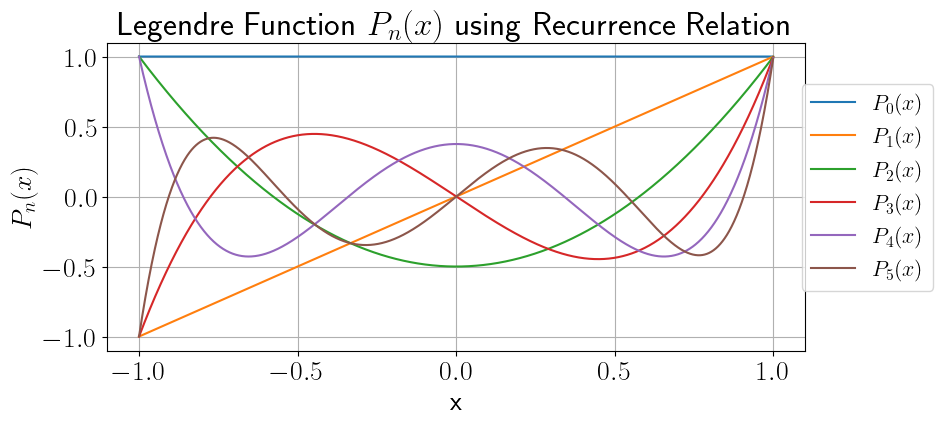

In [2]:
def P(n, x): 
    if n == 0:
        return 1 + 0. * x                                                            # P_0(x)=1
    elif n == 1:
        return x                                                                     # P_1(x)=x
    else:
        return (((2 * n - 1) * x * P(n - 1, x) - (n - 1) * P(n - 2, x)) / float(n))  # P_n(x)

x = np.arange(-1, 1., 0.001)     # Range of x values

for n in range(0, 5+1):
    plt.plot(x, P(n, x), label=f'$P_{n}(x)$')
plt.xlabel('x')
plt.ylabel(r'$P_n(x)$')
plt.title('Legendre Function $P_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$\text{ Chebyshev  differential equation}$ has the form

$\qquad\qquad \displaystyle(1-x^2)\ddot{y}-x\dot{y}+n^2y=0$

$ \displaystyle T_n(x)=\cos(n \cos^{-1} x)$

$ \displaystyle T_0(x)=1$

$ \displaystyle T_1(x)=x$

$ \displaystyle T_2(x)=2x^2-1$

$ \displaystyle T_3(x)=4x^3-3x$

The generating function equation for the Chebyshev polynomials $T_n(x)$ is defined by the equation

$\displaystyle \frac{1-hx}{1-2hx+h^2} = \sum^∞_{n=0}T_n(x)h^n$

Recall the trigonometric addition formulas,

$ \displaystyle \cos(\alpha \pm \beta) = \cos(\alpha) \cos(\beta) \mp \sin(\alpha) \sin(\beta)$

Let $n ≥ 1$ , and apply these identities to get

$ \displaystyle T_{n+1}(x) = \cos[(n + 1)\theta] = \cos(n\theta + \theta) = \cos(n\theta)\cos(\theta) − \sin(n\theta)\sin(\theta)$

$ \displaystyle T_{n−1}(x) = \cos[(n − 1)\theta] = \cos(n\theta − \theta)= \cos(n\theta)\cos(\theta) + \sin(n\theta)\sin(\theta)$

Add these two equations, and then use $(1)$ and $(3)$ to obtain

$ \displaystyle T_{n+1}(x) + T_{n−1}(x) = 2 \cos(n\theta)\cos(\theta) = 2xT_n(x)$

$  \displaystyle T_{n+1}(x) = 2xT_n(x) − T_{n−1}(x), n ≥ 1$

This is called the triple recursion relation for the Chebyshev polynomials.

Let $n\rightarrow (n-1)$

then , $ \displaystyle T_{(n-1)+1}(x)=2xT_{(n-1)}(x)-T_{(n-1)-1}(x)$

or , $ \displaystyle \boxed{T_{n}(x)=2xT_{n-1}(x)-T_{n-2}(x)}$

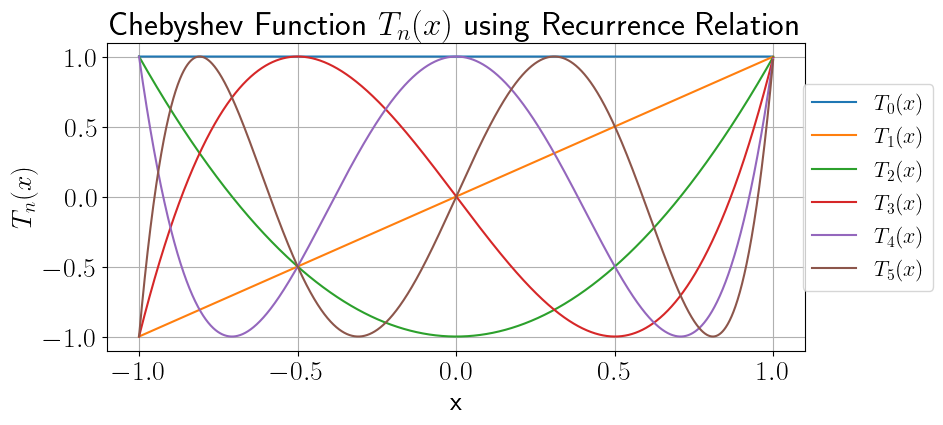

In [3]:
def T(n,x):
    
    if n==0:
        return 1 + 0.*x
    elif n==1:
        return x
    else:
        return 2 * x * T(n - 1, x) - T(n - 2, x)
    
x = np.arange(-1., 1., 0.001) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, T(n, x), label=f'$T_{n}(x)$')
plt.xlabel('x')
plt.ylim(-1.1,1.1)
plt.ylabel(r'$T_n(x)$')
plt.title('Chebyshev Function $T_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$ \displaystyle T_n(x)=U_n(x)-xU_{n-1}(x)$

$ \displaystyle(1-x^2)U_n(x)=xT_{n+1}(x)-T_{n+2}(x)$

or , $\displaystyle\boxed{U_n(x)=\frac{xT_{n+1}(x)-T_{n+2}(x)}{(1-x^2)}}$

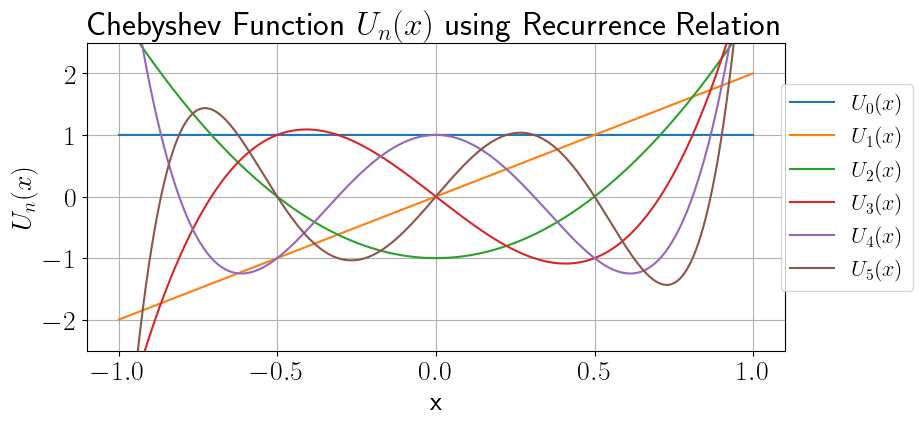

In [4]:
def U(n, x):
    
    def T(n, x):
        if n == 0:
            return 1 + 0. * x
        elif n == 1:
            return x
        else:
            return 2 * x * T(n - 1, x) - T(n - 2, x) 
    return (x * T(n + 1, x) - T(n + 2, x))/(1 - x**2)
    
x = np.arange(-1.0, 1., 0.001)

for n in range(0, 5+1):
    plt.plot(x, U(n, x), label=f'$U_{n}(x)$')
plt.xlabel('x')
plt.ylim(-2.5,2.5)
plt.ylabel(r'$U_n(x)$')
plt.title('Chebyshev Function $U_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$\text{Hermite  differential equation}$ has the form

$\qquad\qquad \displaystyle\ddot{y} - 2x\dot{y} + 2ny = 0 $

$ \displaystyle H_n(x)= (-1)^n e^{x^2} \frac{d^n}{dx^n}(x^n e^{-x^2})$

$ \displaystyle H_0(x)=1 $

$ \displaystyle H_1(x)=2x$

$ \displaystyle H_2(x)=4x^2-2$

$ \displaystyle H_3(x)=8x^3-12x$

The generating function equation for the Hermite polynomials $H_n(x)$ reads

$\displaystyle e^{2hx−h^2}=\sum^∞_{n=0}\frac{H_n(x)h^n}{n!}$

we differentiate above eqn. with respect to $h$ to yield

or , $\displaystyle (2x-2h)e^{2hx−h^2}=\sum_n\frac{H_n(x).n.h^{n-1}}{n!}$

or , $\displaystyle (2x-2h)\sum_n\frac{H_n(x)h^n}{n!}=\sum_n\frac{H_n(x).n.h^{n-1}}{n.(n-1)!}$

or , $\displaystyle 2x\sum_n\frac{H_n(x)h^n}{n!}-2h\sum_n\frac{H_n(x)h^n}{n!}=\sum_n\frac{H_n(x)h^{n-1}}{(n-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2h \frac{H_n(x)h^n}{n!}=\sum_n\frac{H_n(x)h^{n-1}}{(n-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2 \frac{H_n(x)h^{n+1}}{n!}=\sum_n\frac{H_n(x)h^{n-1}}{(n-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2 \frac{H_{n-1}(x)h^{(n-1)+1}}{(n-1)!}=\sum_n\frac{H_{n+1}(x)h^{(n+1)-1}}{(n+1-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2 \frac{H_{n-1}(x)h^{n}}{(n-1)!}=\sum_n\frac{H_{n+1}(x)h^{n}}{n!}$

or , $\displaystyle \sum_n\frac{ 2x H_n(x)h^n}{n!}-\sum_n \frac{2n H_{n-1}(x)h^{n}}{n.(n-1)!}=\sum_n\frac{H_{n+1}(x)h^{n}}{n!}$

or , $\displaystyle \sum_n\frac{ 2x H_n(x)h^n}{n!}-\sum_n \frac{2n H_{n-1}(x)h^{n}}{n!}=\sum_n\frac{H_{n+1}(x)h^{n}}{n!}$

Equating coefficients of $h^n$ we obtain
  
or , $ \displaystyle H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x)$

Let $n\rightarrow (n-1)$

then , $ \displaystyle H_{(n-1)+1}(x)=2xH_{(n-1)}(x)-2(n-1)H_{(n-1)-1}(x)$

or , $ \displaystyle\boxed{H_{n}(x)=2xH_{n-1}(x)-2(n-1)H_{n-2}(x)}$

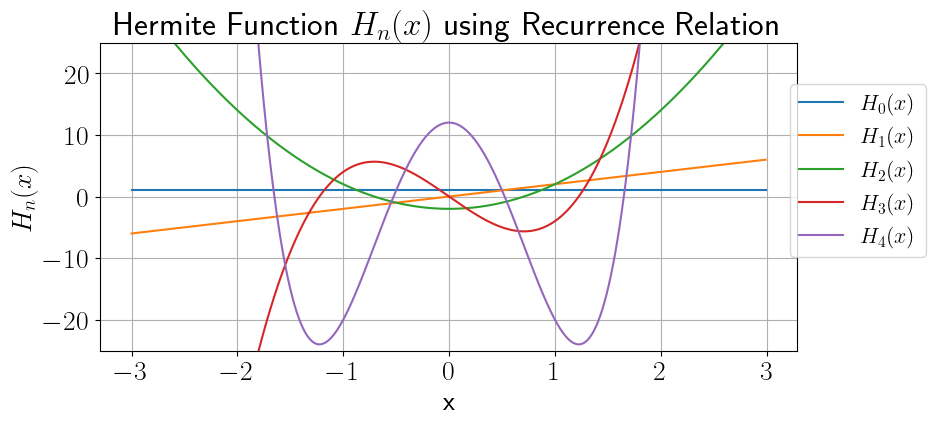

In [5]:
def H(n, x): 
    
    if(n == 0):
        return 1.0 + 0.* x                                             # H_0(x) = 1
    elif(n == 1):
        return 2.* x                                                   # H_1(x) = x
    else:
        return (2.* x * H(n - 1 , x ) - 2 * ( n - 1 ) * H(n - 2 , x))  # H_n(x)

x=np.arange( -3, 3, 0.01)  # Range of x values

for n in range(0, 5):
    plt.plot(x, H(n,x), label=f'$H_{n}(x)$')
plt.ylim([-25, 25])
plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')
plt.title('Hermite Function $H_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$\text{Laguerre  differential equation}$ has the form

$\qquad\qquad\displaystyle x\ddot{y} + (1 - x)\dot{y} + n y = 0 $

$ \displaystyle L_n(x)=e^x \frac{d^n}{dx^n}(x^n e^{-x})$

$ \displaystyle L_0(x)=1 $

$ \displaystyle L_1(x)=1-x$

$ \displaystyle L_2(x)=x^2-4x+2$

$ \displaystyle L_3(x)=-x^3+9x^2-18x+6$

The generating function for the Laguerre polynomials $L_n(x)$ is given by

$\displaystyle \frac{\exp\bigg({−\frac{xh}{(1−h)}}\bigg)}{(1 − h)}=\sum^∞_{n=0}L_n(x)h^n$

Differentiating the generating function above with respect to $h$, we find

or , $\displaystyle \frac{\bigg(−\frac{hx}{(1-h)^2}−\frac{x}{1-h}\bigg)\exp\big(−\frac{hx}{1-h}\big)}{1-h}+\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)^2}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \bigg\{{\bigg(−\frac{hx}{(1-h)^2}−\frac{x}{1-h}\bigg)}+\frac{1}{1-h}\bigg\}\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle {\bigg(−\frac{hx}{(1-h)^2}−\frac{x}{1-h}}+\frac{1}{1-h}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle {\bigg(−\frac{hx}{(1-h)^2}−\frac{x(1-h)}{(1-h)^2}}+\frac{(1-h)}{(1-h)^2}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle {\bigg(−\frac{hx}{(1-h)^2}−\frac{x-xh}{(1-h)^2}}+\frac{1-h}{(1-h)^2}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \bigg(\frac{1-h-x+xh−hx}{(1-h)^2}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \frac{(1 − x − h) \ {\exp\bigg({−\frac{xh}{(1−h)}}\bigg)}}{(1 − h)^3} = \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \frac{(1 − x − h)}{(1 − h)^2} \ \frac{{\exp\bigg({−\frac{xh}{(1−h)}}\bigg)}}{(1 − h)} = \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \frac{(1 − x − h)}{(1 − h)^2}\sum_n L_n(x)h^n  = \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle (1 − x − h) \sum_n L_n(x)h^n = (1 − h)^2 \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle (1 − x − h) \sum_n L_n(x)h^n =(1 −2h +h^2) \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \sum_n L_n(x)h^n − x\sum_n L_n(x)h^n − h\sum_n L_n(x)h^n =  \sum_n nL_n(x)h^{n−1} − 2h \sum_n nL_n(x)h^{n−1}+ h^2 \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_n(x)h^{n+1} =  \sum_n nL_n(x)h^{n−1} − \sum_n 2nL_n(x)h^{n−1+1}+  \sum_n nL_n(x)h^{n−1+2}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_n(x)h^{n+1} =  \sum_n nL_n(x)h^{n−1} −  \sum_n 2nL_n(x)h^{n}+  \sum_n nL_n(x)h^{n+1}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_{n-1}(x)h^{(n-1)+1} =  \sum_n (n+1)L_{n+1}(x)h^{(n+1)−1} −  \sum_n 2nL_n(x)h^{n}+  \sum_n (n-1)L_{n-1}(x)h^{(n-1)+1}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_{n-1}(x)h^{n} =  \sum_n (n+1)L_{n+1}(x)h^{n} −  \sum_n 2nL_n(x)h^{n}+  \sum_n (n-1)L_{n-1}(x)h^{n}$

or , $\displaystyle \sum_n (1-x)L_n(x)h^n − \sum_n L_{n-1}(x)h^{n} =  \sum_n (n+1)L_{n+1}(x)h^{n} −  \sum_n 2nL_n(x)h^{n}+  \sum_n(n-1)L_{n-1}(x)h^{n}$

and, on equating coefficients of $h^n$ on each side, we obtain

or , $ \displaystyle(1 − x)L_n(x) − L_{n−1}(x) = (n + 1)L_{n+1}(x) − 2nL_n(x) + (n − 1)L_{n−1}(x)$

or , $ \displaystyle(1 − x)L_n(x) + 2nL_n(x) − L_{n−1}(x) - (n − 1)L_{n−1}(x)= (n + 1)L_{n+1}(x) $

or , $ \displaystyle(n+1)L_{n+1}(x)=(2n+1-x)L_n(x)-nL_{n-1}(x)$

let $ n\rightarrow (n-1)$

then , $ \displaystyle \{(n-1)+1\}L_{(n-1)+1}(x)=\{2(n-1)+1-x\}L_{(n-1)}(x)-{{(n-1)}L_{(n-1)-1}}(x)$

or , $ \displaystyle nL_{n}(x)=(2n-2+1-x)L_{n-1}(x)-{{(n-1)}L_{n-2}}(x)$

or , $ \displaystyle\boxed{L_{n}(x)=\frac{(2n-1-x)L_{n-1}(x)-{{(n-1)}L_{n-2}}(x)}{n}}$


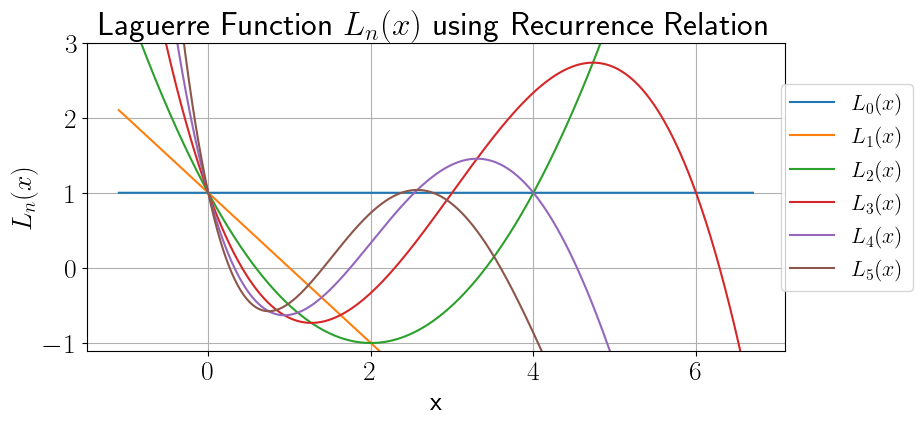

In [6]:
def L(n, x):
    
    if n == 0:
        return 1.0 + 0.* x                                                    # L_0(x) = 1
    elif n == 1:
        return 1 - x                                                          # L_1(1) = 1 - x
    else:
        return ((2 * n - 1 - x) * L(n - 1, x) - (n - 1) * L(n - 2, x)) / n    # L_n(x)

x = np.arange(-1.1, 6.7, 0.001) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, L(n, x), label=f'$L_{n}(x)$')
plt.xlabel('x')
plt.ylim(-1.1,3)
plt.ylabel(r'$L_n(x)$')
plt.title('Laguerre Function $L_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$\text{Bessel's  differential equation}$  has the form

$\qquad\qquad\displaystyle x^2 \ddot{y} + x \dot{y} + (x^2 - n^2) y = 0 $

$ \displaystyle y=AJ_n(x)+BY_n(x)$

$\displaystyle J_n(x) = \sum_{m=0}^\infty\frac{(-1)^m}{m! \Gamma(m+n+1)} \bigg(\frac{x}{2}\bigg)^{2m+n}$

$ \displaystyle J_0(x)=\frac{\sin x}{x}$

$ \displaystyle J_1(x)=\frac{\sin x}{x^2}-\frac{\cos x}{x}$

$ \displaystyle J_2(x)=\big(\frac{3}{x^2}-1\big)\frac{\sin x}{x}-\frac{3\cos x}{x^2}$

$ \displaystyle J_3(x)=\big(\frac{15}{x^3}-\frac{6}{x}\big)\frac{\sin x}{x} - \big(\frac{15}{x^2}-1\big)\frac{\cos x}{x}$

The generating function equation for the Bessel polynomials of $J_n(x)$

$\displaystyle {e^{\frac{x}{2}\big( {h-\frac{1}{h}} \big)}=\sum_{n=-\infty}^\infty J_n(x)h^n}$

Differentiating above relation w.r.t. $h$ , we obtain

or , $\displaystyle {\frac{x}{2}\bigg(1+\frac{1}{h^2}\bigg) e^{\frac{x}{2}\big(h-\frac{1}{h}\big)}=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle {\frac{x}{2}\bigg(1+\frac{1}{h^2}\bigg) \sum_{n}J_n(x)h^n=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\bigg(\frac{x}{2}+\frac{x}{2h^2}\bigg)J_n(x)h^n=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2h^2} J_n(x)h^n  =\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2} J_n(x)h^{n-2}=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2} J_{n+2}(x)h^{(n+2)-2}=\sum_{n}(n+1)J_{n+1}(x)h^{(n+1)-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2} J_{n+2}(x)h^{n}  =\sum_{n}(n+1)J_{n+1}(x)h^{n}}$

and, on equating coefficients of  $h^n$ on each side, we obtain

or , $\displaystyle {\frac{x}{2} J_n(x) + \frac{x}{2} J_{n+2}(x)  = (n+1)J_{n+1}(x)}$

Let , $ n\rightarrow (n-1)$

or , $\displaystyle {\frac{x}{2} J_{n-1}(x) + \frac{x}{2} J_{(n-1)+2}(x)  = \{(n-1)+1\} J_{(n-1)+1}(x)}$

or , $\displaystyle {\frac{x}{2} J_{n-1}(x) + \frac{x}{2} J_{n+1}(x)  = nJ_{n}(x)}$

or , $\displaystyle {\frac{x}{2}\big( J_{n-1}(x) + J_{n+1}(x) \big) = nJ_{n}(x)}$

or , $\displaystyle {J_{n-1}(x) + J_{n+1}(x) = \frac{2n}{x}J_{n}(x)}$

or , $\displaystyle {J_{n+1}(x) = \frac{2n}{x}J_{n}(x)-J_{n-1}(x) }$

Let , $n\rightarrow(n-1)$

or , $\displaystyle {J_{(n-1)+1}(x) = 2\frac{n-1}{x}J_{n-1}(x)-J_{(n-1)-1}(x) }$

or , $\displaystyle \boxed{J_{n}(x) = 2\frac{n-1}{x}J_{n-1}(x)-J_{n-2}(x) }$

This is Bessel Polynomials of $1^{st}$ order

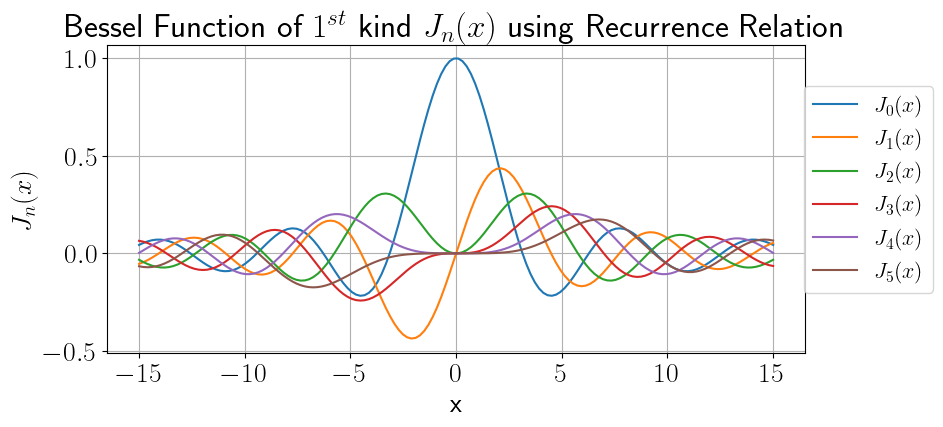

In [5]:
def J(n, x):
    if n == 0:
        return np.sin(x) / x                                       # J_0(x)
    elif n == 1:
        return np.sin(x) / x**2 - np.cos(x) / x                    # J_1(x)
    else:
        return ((2 * n - 1 ) / x) * J(n - 1, x) - J(n - 2, x)      # J_n(x)

x = np.linspace(-15, 15, 150)  # Range of x values

for n in range(0, 5+1):
    plt.plot(x,J(n, x), label=f'$J_{n}(x)$')
plt.xlabel('x')
plt.ylabel('$J_n(x)$')
plt.title('Bessel Function of $1^{st}$ kind $J_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

 
 $\displaystyle Y_n(x)=\lim_{p\rightarrow n} \frac{J_p(x)\cos(p\pi)-J_{-p}(x)}{\sin(p\pi)} \qquad\qquad\qquad n=0,1,2,3,\dots$
 
$ \displaystyle Y_0(x)=-J_{-1}(x)=-\frac{\cos x}{x}$

$ \displaystyle Y_1(x)=J_{-2}(x)=-\frac{\cos x}{x^2}-\frac{\sin x}{x}$

$ \displaystyle Y_2(x)=-J_{-3}(x)=\big(-\frac{3}{x^2}+1\big)\frac{\cos x}{x}-\frac{3\sin x}{x^2}$

$ \displaystyle Y_3(x)=J_{-4}(x)=\big(-\frac{15}{x^3}+\frac{6}{x}\big)\frac{\cos x}{x} - \big(\frac{15}{x^2}-1\big)\frac{\sin x}{x}$ 

$ \displaystyle\boxed{Y_{n}(x)=2\frac{n-1}{x}Y_{n-1}(x)-Y_{n-2}(x)}$

Bessel Polynomials $2^{nd}$ order

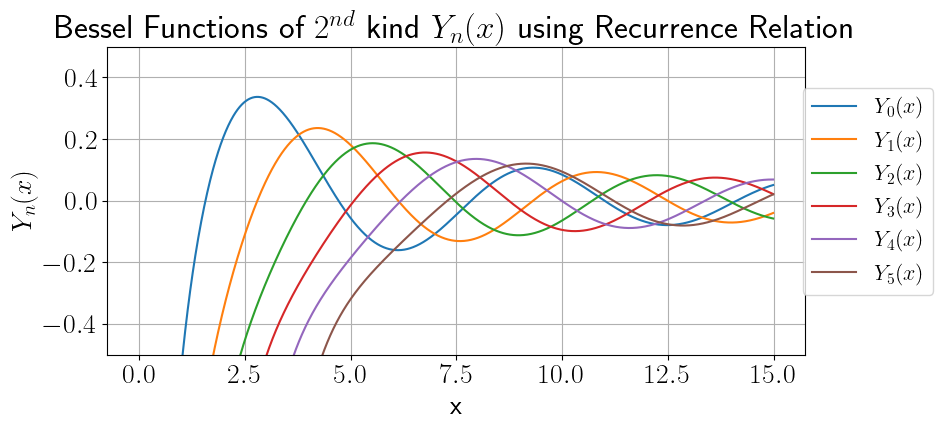

In [3]:
def Y(n, x):
    if n == 0:
        return -np.cos(x) / x                                  # Y_0(x)
    elif n == 1:
        return -np.cos(x) / x**2 - np.sin(x) / x               # Y_1(x)
    else:
        return ( (2 * n - 1) / x) * Y(n - 1, x) - Y(n - 2, x)  # Y_n(x)
       
x = np.arange(1e-12, 15, 0.01) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, Y(n,x), label=f'$Y_{n}(x)$')
plt.ylim(-0.5,0.5)
plt.xlabel('x')
plt.ylabel(r'$Y_n(x)$')
plt.title('Bessel Functions of $2^{nd}$ kind $Y_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)  
plt.show()

Bessel Functions of the Third Kind

$H^{(1)}_p (x) = J_p(x) + iN_p(x)$

$H^{(2)}_p (x) = J_p(x) - iN_p(x)$

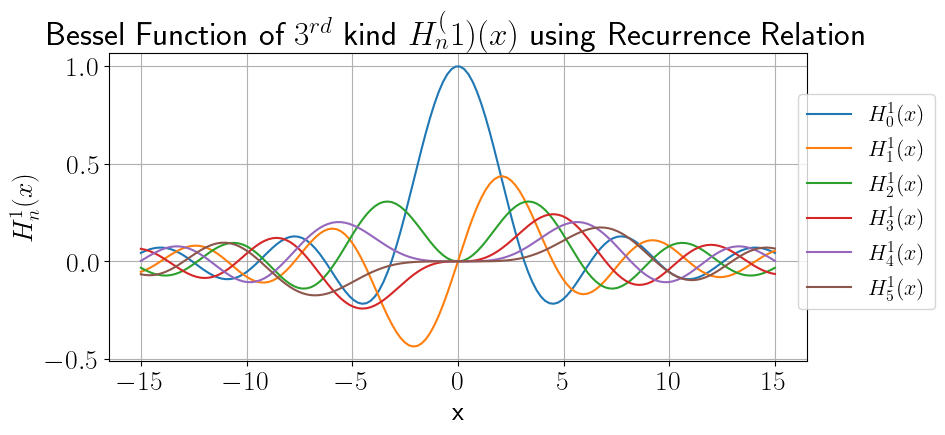

In [4]:
def H1(n,x):
    return J(n,x) + 1j*Y(n,x)

x = np.linspace(-15, 15, 150)  # Range of x values

for n in range(0, 5+1):
    plt.plot(x,H1(n, x), label=f'$H_{n}^{(1)}(x)$')
plt.xlabel('x')
plt.ylabel('$H_n^{1}(x)$')
plt.title('Bessel Function of $3^{rd}$ kind $H_n^(1)(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

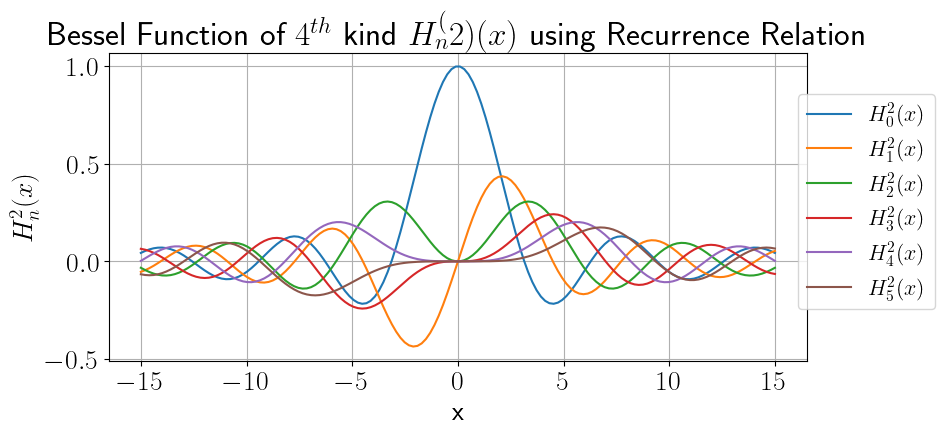

In [5]:
def H2(n,x):
    return J(n,x) - 1j*Y(n,x)

x = np.linspace(-15, 15, 150)  # Range of x values

for n in range(0, 5+1):
    plt.plot(x,H2(n, x), label=f'$H_{n}^{(2)}(x)$')
plt.xlabel('x')
plt.ylabel('$H_n^{2}(x)$')
plt.title('Bessel Function of $4^{th}$ kind $H_n^(2)(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

# Modified Bessel Function

## $\boxed{I_n(x)=e^{-n \pi i/2}J_n(ix)}$

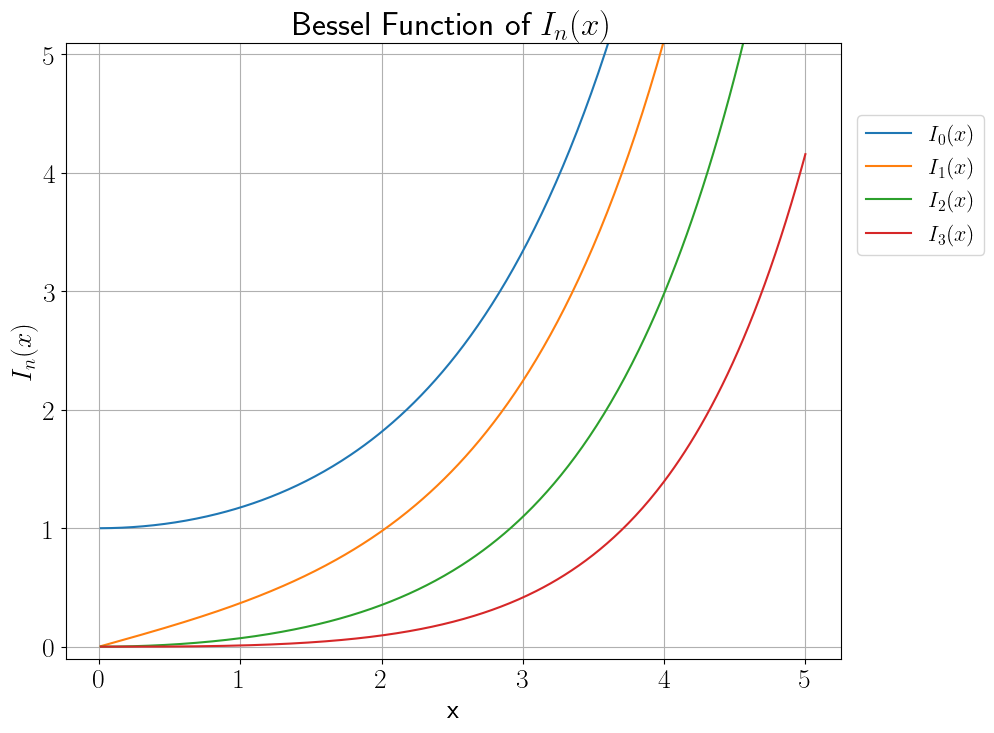

In [11]:
def I(n,x):
    return np.exp(-1j*n*np.pi/2)*J(n,1j*x)

x = np.linspace(0, 5, 400)  # Range of x values

plt.figure(figsize=(10,8))
for n in range(0, 4):
    plt.plot(x,I(n, x), label=f'$I_{n}(x)$')
plt.xlabel('x')
plt.ylabel('$I_n(x)$')
plt.title('Bessel Function of $I_n(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.ylim([-0.1,5.1])
plt.grid(True)
plt.show()

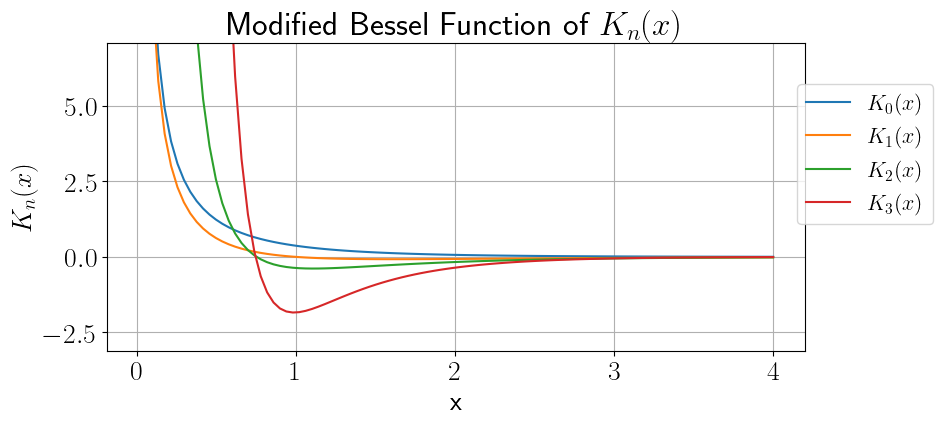

In [3]:
def K(n, x):
    if n == 0:
        return np.exp(-x) / x
    elif n == 1:
        return np.exp(-x) * (1/x - 1)
    else:
        return ((2 * n - 1) / x) * K(n - 1, x) - K(n - 2, x)

x = np.linspace(0.01, 4, 100)  # Range of x values

for n in range(0, 4):
    plt.plot(x, K(n, x), label=f'$K_{n}(x)$')
plt.xlabel('x')
plt.ylim(-3.1, 7.1)
plt.ylabel('$K_n(x)$')
plt.title('Modified Bessel Function of $K_n(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()


$\text{Hyper-Geometric Function differential equation}$ has the form

$\qquad\qquad\displaystyle x(1-x)\ddot{y}+[c-(a+b+1)x]\dot{y}-aby=0$

$\displaystyle{ {}_2F_1(x,a,b,c)=1+\frac{a\cdot b}{c}\frac{x}{1!}+\frac{a\cdot(a+1)\cdot b\cdot(b+1)}{c\cdot(c+1)}\frac{x^2}{2!}+\frac{a\cdot(a+1)\cdot(a+2)\cdot b\cdot(b+1)\cdot(b+2)}{c\cdot(c+1)\cdot(c+2)}\frac{x^3}{3!}+\dots=\sum_{k=0}^\infty\frac{(a)_k\cdot (b)_k}{(c)_k} \frac{x^k}{k!}}$

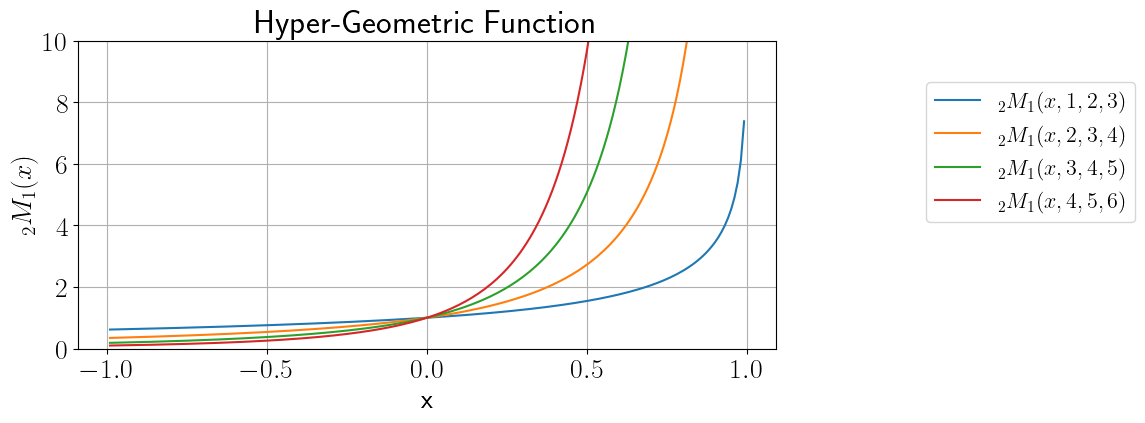

In [27]:
def h2f1(x,a,b,c,n=1):
    
    s,t=1,1
    while(abs(t)>1e-12):
        t  = t*(a*b/c)*(x/n)
        s += t
        n += 1
        a += 1
        b += 1
        c += 1
    return s

x = np.arange(-1+1e-2, 1., 0.01)
A = np.arange(1,5,1)
B = A + 1
C = B + 1

for a,b,c in zip(A,B,C):
    y = [h2f1(i, a, b, c) for i in x]
    plt.plot(x, y, label=r'${}_2M_1(x,%i,%i,%i)$'%(a,b,c))
plt.xlabel('x')
plt.ylabel(r'${}_2M_1(x)$')
plt.ylim(0,10)
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.title('Hyper-Geometric Function')
plt.grid(True)
plt.show()

 $\text{Confluenr Hyper-Geometric Function differential equation}$ has the form

$\qquad\qquad\displaystyle x \ddot{y} + (b-x) \dot{y} - ay = 0 $

$\displaystyle{ {}_1F_1(x,a,b)=1+\frac{a}{b}\frac{x}{1!}+\frac{a\cdot(a+1)}{b\cdot(b+1)}\frac{x^2}{2!}+\frac{a\cdot(a+1)\cdot(a+2)}{b\cdot(b+1)\cdot(b+2)}\frac{x^3}{3!}+\dots=\sum_{k=0}^\infty\frac{(a)_k}{(b)_k} \frac{x^k}{k!}}$

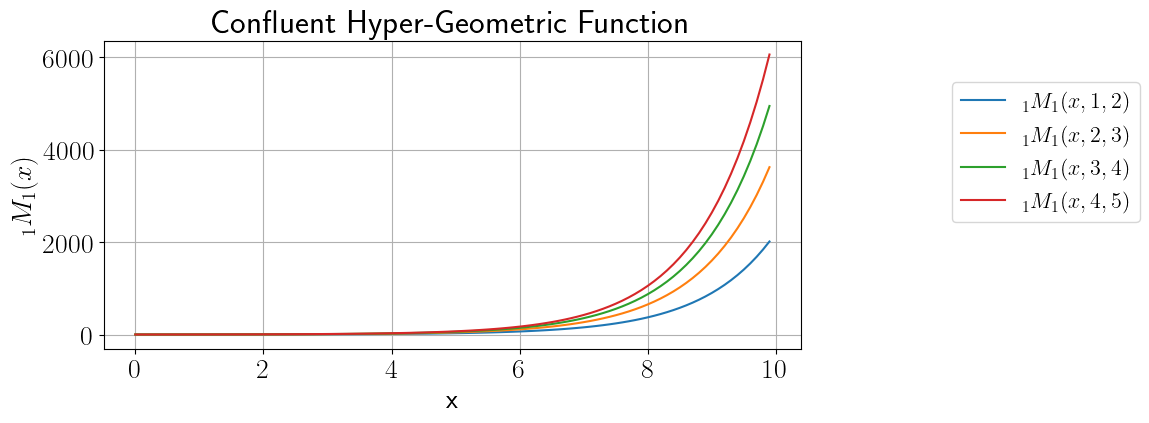

In [11]:
def h1f1(x,a,b,n=1):
    
    s,t=1,1
    while(abs(t)>1e-12):
        t  = t*(a/b)*(x/n)
        s += t
        n += 1
        a += 1
        b += 1
    return s

x = np.arange(0, 10, 0.1)
A = np.arange(1,5,1)
B = A+1

for a,b in zip(A,B):
    y = [h1f1(i, a, b) for i in x]
    plt.plot(x, y, label=r'${}_1M_1(x,%i,%i)$'%(a,b))
plt.xlabel('x')
plt.ylabel(r'${}_1M_1(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.title('Confluent Hyper-Geometric Function')
plt.grid(True)
plt.show()

$\displaystyle L_n(x)=n!\sum_{k=0}^\infty \frac{(-n)_k}{n!} \frac{n!}{(k!)^2}x^k=n!\sum_{k=0}^\infty \frac{(-n)_k}{(k!)^2}x^k=n! F(-n,1,x)$

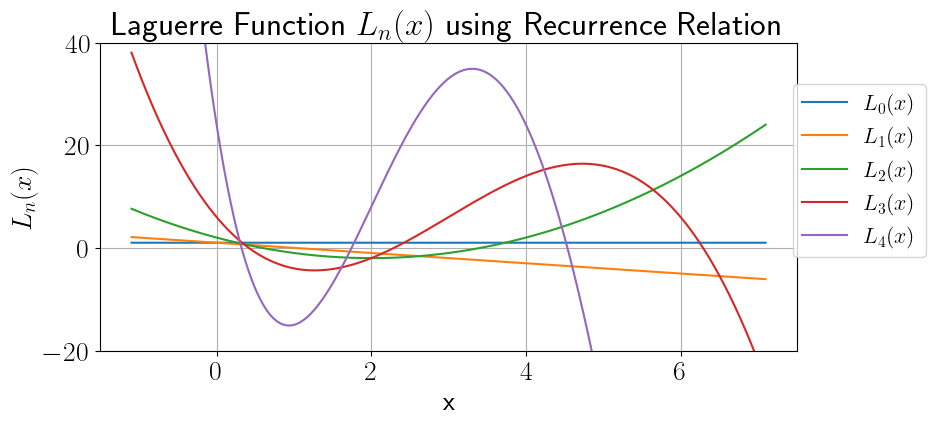

In [12]:
import math

def Lh1f1(x,n,h1f1):
    return h1f1(x,-n,1)*math.factorial(n)

x = np.arange(-1.1, 7.1, 0.001) # Range of x values

for n in range(0, 5):
    y = [Lh1f1(i, n, h1f1) for i in x]
    plt.plot(x, y, label=f'$L_{n}(x)$')
plt.xlabel('x')
plt.ylim(-20,40)
plt.ylabel(r'$L_n(x)$')
plt.title('Laguerre Function $L_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()